# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Magic matplotlib command to have plots shown in the notebook
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(url,sep= "\t")
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 3. Assign it to a variable called `chipo`.

In [3]:
chipo = df
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. Display the first 10 entries.

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items ordered

<BarContainer object of 5 artists>

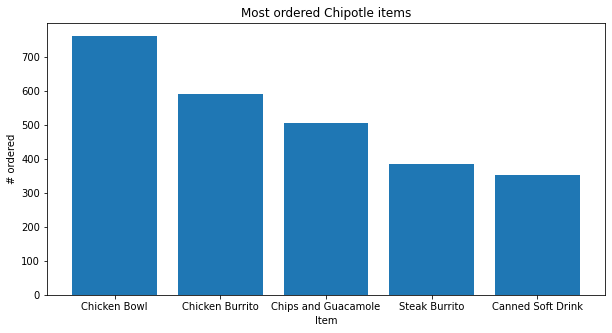

In [5]:
x=chipo.groupby('item_name').sum().sort_values('quantity', ascending= False).head()
del x['order_id']

plt.figure(1, figsize=(10,5))
plt.xlabel("Item")
plt.ylabel("# ordered")
plt.title("Most ordered Chipotle items")
plt.bar(x.index, x.quantity)


### Step 6. Create a scatter plot with the order price as a function of the number of items ordered
#### Hint: Price should be in the Y-axis and Items ordered in the X-axis

In [6]:
chipo["item_price"]= chipo.item_price.str.slice(1).astype(float)


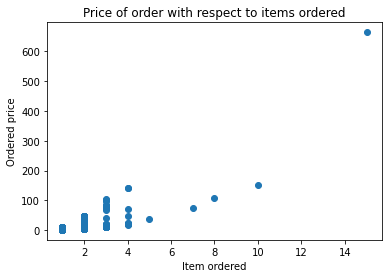

In [7]:


chipo['order_price'] = chipo['quantity']*chipo['item_price']

plt.xlabel("Item ordered")
plt.ylabel("Ordered price")
plt.title("Price of order with respect to items ordered")
plt.scatter(chipo['quantity'], chipo['order_price'])
plt.show()


In [10]:
chipo

,order_id,quantity,item_name,choice_description,item_price,order_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [9]:
chipo_order= chipo.groupby('order_id').sum()
chipo_order

,quantity,item_price,order_price
order_id,,,
1,4,11.56,11.56
2,2,16.98,33.96
3,2,12.67,12.67
4,2,21.00,21.00
5,2,13.70,13.70
...,...,...,...
1830,2,23.00,23.00
1831,3,12.90,12.90
1832,2,13.20,13.20


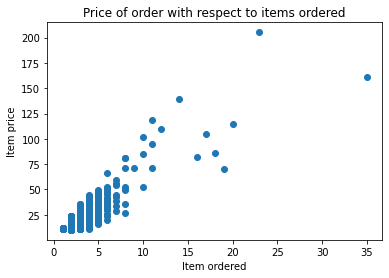

In [11]:
chipo_order= chipo.groupby('order_id').sum()
plt.xlabel("Item ordered")
plt.ylabel("Item price")
plt.title("Price of order with respect to items ordered")
plt.scatter(chipo_order['quantity'], chipo_order['item_price'])


### BONUS: Create a question and a graph to answer your own question.